Date : 12/12/2023

## Web Scrapping

<img src="6zM7JBq.png" alt="web_scrapping">

1. The process of collecting and parsing raw data from web-page is kown as **Web Scrapping**

### Imports

In [1]:
### -------------------
### Importing libraries
### -------------------

import urllib

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist, pos_tag

import string

import regex as re

from bs4 import BeautifulSoup  # Library for web scrapping

### Input data

In [2]:
### ----------
### input data
### ----------

# https://en.wikipedia.org/wiki/Rajgad_Fort

''' 
    In this example, 
    urlopen opens the URL 'https://en.wikipedia.org/wiki/Rajgad_Fort' and returns a response object.
    The read method is then called on the response object to read the content of the URL. 
    The content is then printed to the console 
'''

url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

url

In [28]:
# method to read web page

data=url.read()

In [29]:
# html code of web page

print(data)

b''


In [5]:
# Converting the byte code into text

data=data.decode('utf-8')

#### ----------------------------------------------------------------------------------------------------------
# Tasks
#### ----------------------------------------------------------------------------------------------------------

### 1. Find the title tag in the webpage

#### Finding the starting indices of the title tag

In [6]:
# To find where is title tag

start=data.find('<title>')

start

666

#### Finding the end indices of the title tag

In [7]:
# Place where title tag is ending

end=data.find('</title>')

end

696

### 2. Print the Content between the title tags

In [8]:
#data inside the title tag
data[start+7:end]

'Rajgad Fort - Wikipedia'

### 3. Print the number of images in the webpage

In [9]:
#To count number of images tag

Sum = data.count('<img')

Sum

29

In [10]:
#findall function to find number of image tags

len(re.findall('<img.*?',data))

29

In [11]:
# re method to find content betwween the first title tags

pattern="<title.*?>.*?</title.*?>"

match_result=re.search(pattern,data,re.IGNORECASE)

title=match_result.group()

title=re.sub("<.*?>","",title) #Remove html tag

print(title)

Rajgad Fort - Wikipedia


### Parsing the webpage using Beautiful Soup

In [27]:
# Parsing the webpage, with the help of the Beautiful soup library

soup = BeautifulSoup(data,'html.parser')


# Text data without html tags and without white spaces

text = soup.get_text()

len(text)

122190

### Word Tokenization

In [26]:
# Tokenizeing the words

word_token = word_tokenize(text)

len(word_token)

24697

### Data Cleaning

In [15]:
# Removing the punctuations

punc = string.punctuation

word_without_punc = [word for word in word_token if word not in punc]

len(word_without_punc)

2092

In [16]:
# Removing the stopwords

stopword_list = stopwords.words('english')

word_without_stopwords = [word for word in word_without_punc if word not in stopword_list]

len(word_without_stopwords)

1742

In [17]:
# Removing stems/prefixes

por_stemmer = PorterStemmer()

stem = []

for word in word_without_stopwords:
    
    stem.append(por_stemmer.stem(word, to_lowercase = True))

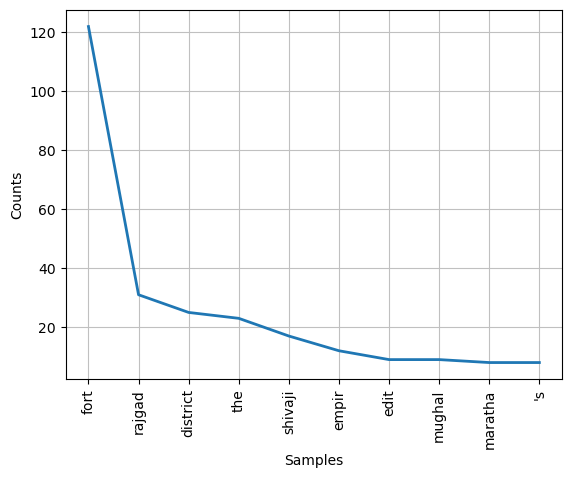

In [18]:
freq = FreqDist(stem)

freq.plot(10, cumulative = False)

print()

In [19]:
# .most_common method returns the most frequent words from the data

freq.most_common(3)

[('fort', 122), ('rajgad', 31), ('district', 25)]

###  Method of sir

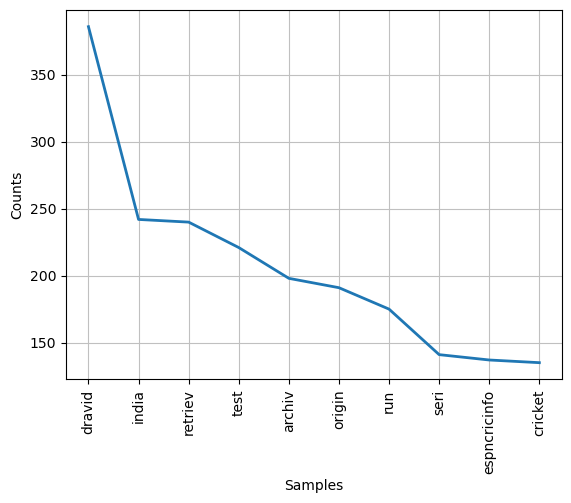

[('dravid', 386), ('india', 242), ('retriev', 240)]

In [20]:
# pasting the link of the webpage

url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Rahul_Dravid')

data=url.read()

ps=PorterStemmer()

soup=BeautifulSoup(data,'html.parser')

text=soup.get_text()

tokens=word_tokenize(text)

swords=stopwords.words('english')

tokens1=[x.lower() for x in tokens if x.isalpha() or x.isdigit()]

tokens2=[ps.stem(x) for x in tokens1 if x not in swords]

freq=FreqDist(tokens2)

freq.plot(10)

freq.most_common(3)

In [21]:
# !pip install setuptools==57.5.0
# !pip install --upgrade pip "setuptools<58.0"
# !pip3 install --upgrade pip "setuptools<58.0"
# !python -m pip install --upgrade pip "setuptools<58.0"
# !python3 -m pip install --upgrade pip "setuptools<58.0"
# !py -m pip install --upgrade pip "setuptools<58.0"
# !pip install pygooglenews
# !pip install google-news-feed

### Find the most frequent verbs in the original form

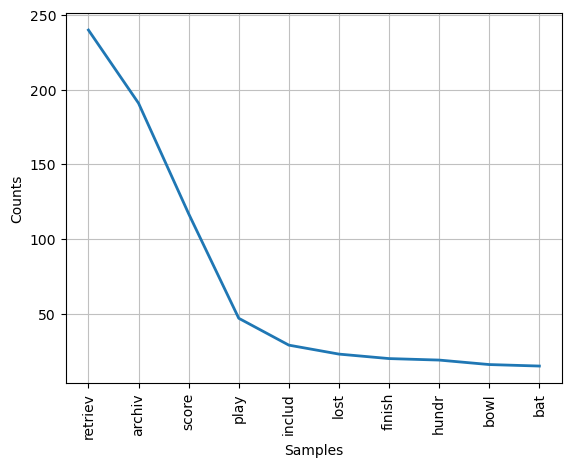

[('retriev', 240), ('archiv', 191), ('score', 117)]

In [22]:
url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Rahul_Dravid')

data=url.read()

ps=PorterStemmer()

soup=BeautifulSoup(data,'html.parser')

text=soup.get_text()

tokens=word_tokenize(text)


# convert the data into POS tags

tags = pos_tag(tokens)

swords=stopwords.words('english')

tokens0 = [word for word, tag  in tags if tag.startswith('V')]

tokens1=[x.lower() for x in tokens0 if x.isalpha() or x.isdigit()]

tokens2=[ps.stem(x) for x in tokens1 if x not in swords]

freq=FreqDist(tokens2)

freq.plot(10)

freq.most_common(3)

### Method of sir

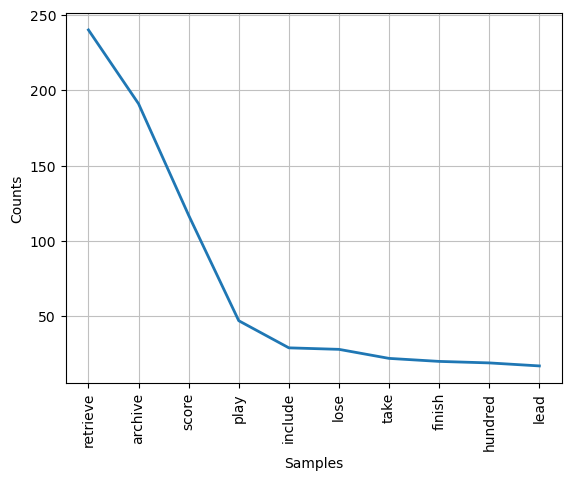

[('retrieve', 240), ('archive', 191), ('score', 117)]

In [23]:
url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Rahul_Dravid')

data=url.read()

wn_lemmatizer = WordNetLemmatizer()

soup=BeautifulSoup(data,'html.parser')

text=soup.get_text()

tokens=word_tokenize(text)


# convert the data into POS tags

tags = pos_tag(tokens)

swords=stopwords.words('english')

tokens0 = [word for word, tag  in tags if tag.startswith('V')]

tokens1=[x.lower() for x in tokens0 if x.isalpha() or x.isdigit()]

# Lemmatizing, with Wordnetlemmatizer

tokens2=[wn_lemmatizer.lemmatize(x, pos = 'v') for x in tokens1 if x not in swords]

freq=FreqDist(tokens2)

freq.plot(10)

freq.most_common(3)